In [2]:
import numpy as np
import astropy.units as u
import astropy.constants as c
from matplotlib import pyplot as plt

c:\Users\shubh\anaconda3\envs\shubh\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\shubh\anaconda3\envs\shubh\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\shubh\anaconda3\envs\shubh\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
(18.56 * 1e-3 * u.dyne / u.angstrom).to(u.N / u.m)

<Quantity 1856. N / m>

In [4]:
reduced_mass = (12*c.m_p * 16*c.m_p) / (12*c.m_p + 16*c.m_p)
force_constant = 1856 * u.N / u.m
vib_freq = 1 / (2 * np.pi) * np.sqrt(force_constant / reduced_mass)

vib_energy = (c.h * vib_freq).to(u.eV)
vib_wv = (c.h * c.c / vib_energy).to(u.micron)

In [5]:
vib_energy, vib_wv

(<Quantity 0.26477944 eV>, <Quantity 4.68254626 micron>)

In [6]:
bond_len = 0.1128 * u.nm
B_rotational = (c.h / (8 * np.pi**2 * reduced_mass * bond_len**2))
deltaE = (2 * c.h * B_rotational).to(u.eV)
deltaE

<Quantity 0.00047564 eV>

In [7]:
def parse_csv_file(filename, xunit, yunit):
    data = np.loadtxt(filename, delimiter=',', usecols=(0,1))
    return np.sort(data[:,0]) * xunit, data[:,1][np.argsort(data[:,0])] * yunit

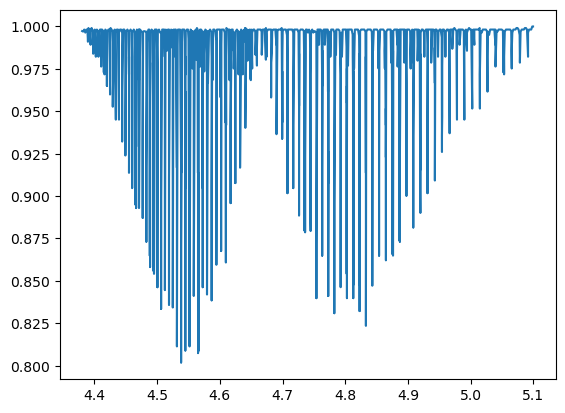

In [8]:
CO_wvs, CO_flux = \
    parse_csv_file("./template_spectra/K_CO.csv", u.micron, u.erg/u.s/u.cm**2/u.micron)
lower_bound = 4.38 * u.micron
upper_bound = 5.1 * u.micron
CO_flux_corrected = (np.min(CO_flux) / CO_flux)
CO_wvs, CO_flux = CO_wvs[CO_wvs > lower_bound], CO_flux_corrected[CO_wvs > lower_bound]
CO_wvs, CO_flux = CO_wvs[CO_wvs < upper_bound], CO_flux[CO_wvs < upper_bound]
plt.figure()
plt.plot(CO_wvs, CO_flux)
plt.show()

In [9]:
def parse_csv_file(filename, xunit, yunit):
    data = np.loadtxt(filename, delimiter=',', usecols=(0,1))
    return np.sort(data[:,0]) * xunit, data[:,1][np.argsort(data[:,0])] * yunit

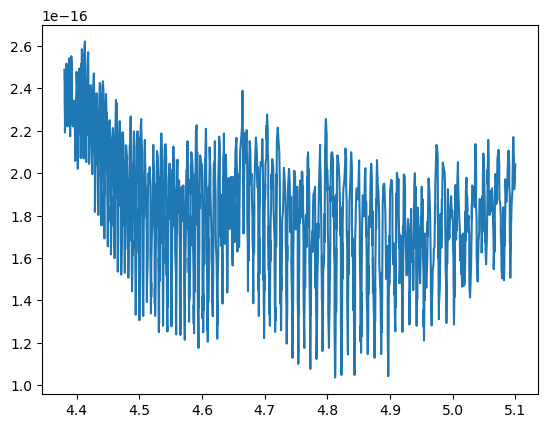

In [10]:
jwst_wvs, jwst_flux = \
    parse_csv_file("./measurements/jwstCO.csv", u.micron, u.Unit('W m-2 micron-1'))
jwst_flux, jwst_wvs = jwst_flux[jwst_wvs > lower_bound], jwst_wvs[jwst_wvs > lower_bound]
jwst_flux, jwst_wvs = jwst_flux[jwst_wvs < upper_bound], jwst_wvs[jwst_wvs < upper_bound]
plt.figure()
plt.plot(jwst_wvs, jwst_flux)
plt.show()

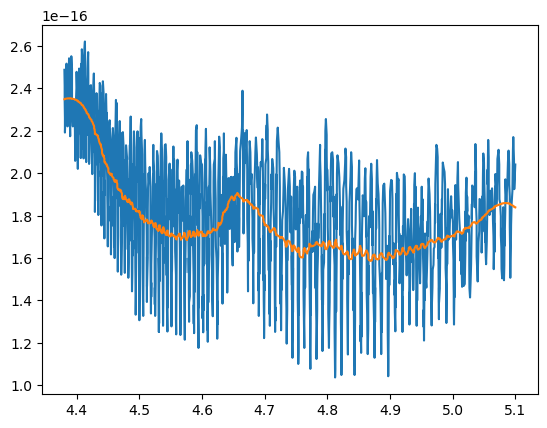

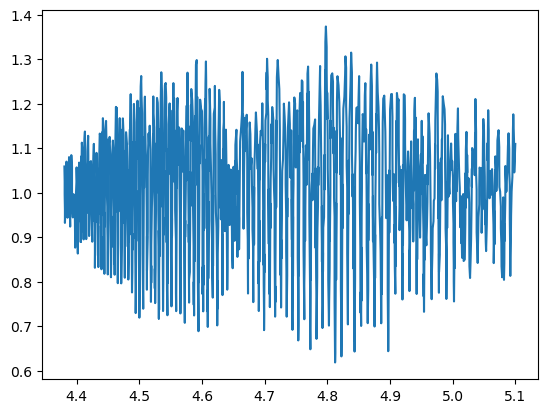

In [11]:
# divide data by continuum
from scipy.signal import savgol_filter
jwst_cont = savgol_filter(jwst_flux, 201, 3)
plt.figure()
plt.plot(jwst_wvs, jwst_flux)
plt.plot(jwst_wvs, jwst_cont)
plt.show()
plt.figure()
jwst_features = jwst_flux/jwst_cont
plt.plot(jwst_wvs, jwst_features)
plt.show()

In [12]:
num_levels = 40
energy_levels = vib_energy + np.arange(-num_levels, num_levels+1) * deltaE
transition_wvs_simple = (c.h * c.c / (energy_levels[::-1])).to(u.micron)
transition_wvs_simple

<Quantity [4.36863679, 4.37597072, 4.38332932, 4.3907127 , 4.398121  ,
           4.40555434, 4.41301286, 4.42049666, 4.4280059 , 4.43554069,
           4.44310117, 4.45068746, 4.45829971, 4.46593804, 4.47360258,
           4.48129348, 4.48901087, 4.49675489, 4.50452567, 4.51232336,
           4.52014808, 4.528     , 4.53587924, 4.54378595, 4.55172027,
           4.55968235, 4.56767233, 4.57569037, 4.5837366 , 4.59181119,
           4.59991427, 4.608046  , 4.61620653, 4.62439602, 4.63261461,
           4.64086247, 4.64913975, 4.65744661, 4.66578321, 4.6741497 ,
           4.68254626, 4.69097303, 4.69943019, 4.7079179 , 4.71643633,
           4.72498563, 4.73356599, 4.74217757, 4.75082053, 4.75949506,
           4.76820133, 4.7769395 , 4.78570976, 4.79451229, 4.80334725,
           4.81221484, 4.82111523, 4.8300486 , 4.83901514, 4.84801503,
           4.85704846, 4.86611562, 4.8752167 , 4.88435188, 4.89352137,
           4.90272534, 4.91196401, 4.92123755, 4.93054618, 4.93989009,
      

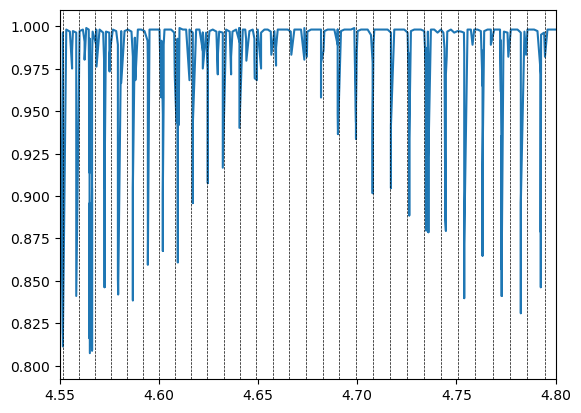

In [13]:
plt.figure()
plt.plot(CO_wvs, CO_flux)
for transition_wv in transition_wvs_simple:
    plt.axvline(transition_wv.value, linewidth=0.5, color='k', linestyle='--')
plt.xlim([4.55, 4.8])
plt.show()

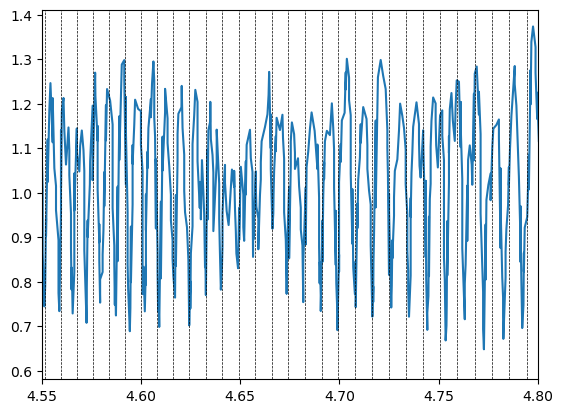

In [14]:
plt.figure()
plt.plot(jwst_wvs, jwst_features)
for transition_wv in transition_wvs_simple:
    plt.axvline(transition_wv.value, linewidth=0.5, color='k', linestyle='--')
plt.xlim([4.55, 4.8])
plt.show()

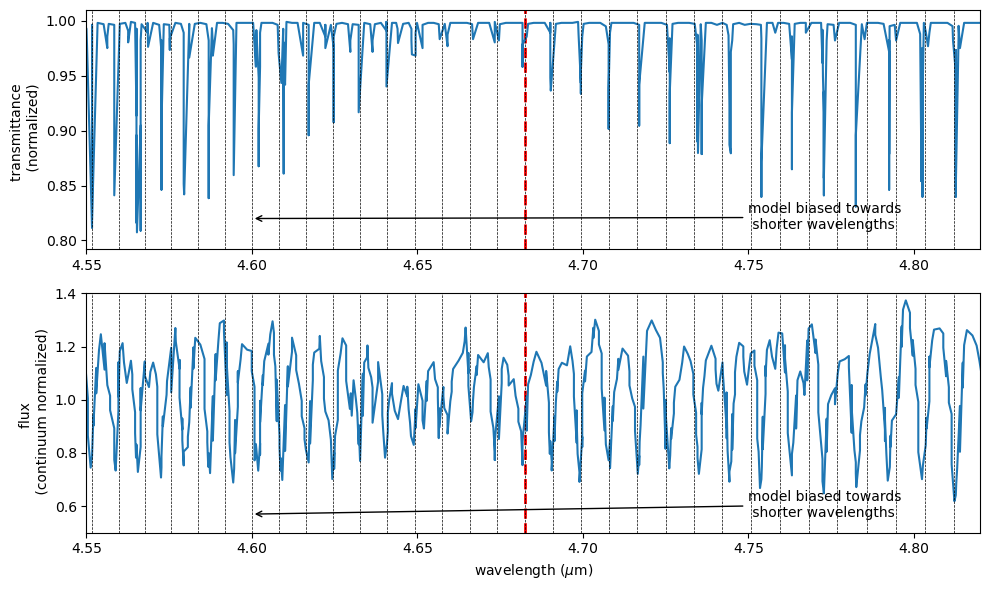

In [15]:
# plot subfigures top and bottom and long and short
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.axvline(vib_wv.value, linewidth=2, color='red', linestyle='--')
plt.plot(CO_wvs, CO_flux)
for transition_wv in transition_wvs_simple:
    plt.axvline(transition_wv.value, linewidth=0.5, color='k', linestyle='--')
plt.xlim([4.55, 4.82])
plt.annotate('model biased towards \n shorter wavelengths',
                xy=(4.6, 0.82), xycoords='data',
                xytext=(4.75, 0.81), textcoords='data',
                arrowprops=dict(arrowstyle="->"))
plt.ylabel("transmittance \n (normalized)")

plt.subplot(2, 1, 2)
plt.axvline(vib_wv.value, linewidth=2, color='red', linestyle='--')
plt.plot(jwst_wvs, jwst_features)
for transition_wv in transition_wvs_simple:
    plt.axvline(transition_wv.value, linewidth=0.5, color='k', linestyle='--')
plt.xlim([4.55, 4.82])
plt.ylim([0.5, 1.4])
plt.annotate('model biased towards \n shorter wavelengths',
                xy=(4.6, 0.57), xycoords='data',
                xytext=(4.75, 0.56), textcoords='data',
                arrowprops=dict(arrowstyle="->"))
plt.xlabel("wavelength ($\mu$m)")
plt.ylabel("flux \n (continuum normalized)")
plt.tight_layout()
plt.savefig("plots/CO_vib_simple.png", dpi=300)
plt.show()

Add centrifugal distortion

In [16]:
deltaE, B_rotational.to(u.GHz)

(<Quantity 0.00047564 eV>, <Quantity 57.50519963 GHz>)

In [17]:
nu = c.c / vib_wv
nu.to(u.GHz)

<Quantity 64023.38415921 GHz>

In [18]:
D_rotational = 4 * B_rotational**3 / nu**2
D_rotational.to(u.GHz), (D_rotational / B_rotational).to("")

(<Quantity 0.00018557 GHz>, <Quantity 3.22698517e-06>)

In [19]:
num_levels = 40
energy_shifts = np.arange(-num_levels, num_levels+1) * deltaE
energy_shifts += (4 * c.h * D_rotational * np.arange(-num_levels, num_levels+1)**3)
energy_levels_centrifugal = vib_energy + energy_shifts

In [20]:
transition_wvs_centrifugal = (c.h * c.c / (energy_levels_centrifugal[::-1])).to(u.micron)
transition_wvs_centrifugal

<Quantity [4.36561465, 4.37316007, 4.3807205 , 4.38829624, 4.39588761,
           4.40349492, 4.41111849, 4.41875864, 4.42641569, 4.43408998,
           4.44178185, 4.44949162, 4.45721964, 4.46496626, 4.47273183,
           4.48051671, 4.48832125, 4.49614582, 4.50399079, 4.51185653,
           4.51974342, 4.52765183, 4.53558217, 4.54353481, 4.55151016,
           4.55950862, 4.56753059, 4.57557648, 4.58364671, 4.5917417 ,
           4.59986188, 4.60800767, 4.61617952, 4.62437785, 4.63260313,
           4.6408558 , 4.64913633, 4.65744516, 4.66578278, 4.67414965,
           4.68254626, 4.69097309, 4.69943063, 4.70791939, 4.71643985,
           4.72499254, 4.73357797, 4.74219667, 4.75084915, 4.75953595,
           4.76825762, 4.7770147 , 4.78580776, 4.79463733, 4.80350401,
           4.81240836, 4.82135096, 4.8303324 , 4.83935328, 4.84841421,
           4.85751579, 4.86665864, 4.87584339, 4.88507068, 4.89434114,
           4.90365542, 4.91301419, 4.92241811, 4.93186786, 4.94136411,
      

In [21]:
transition_wvs_centrifugal - transition_wvs_simple

<Quantity [-3.02214073e-03, -2.81065135e-03, -2.60881815e-03,
           -2.41645941e-03, -2.23339032e-03, -2.05942305e-03,
           -1.89436666e-03, -1.73802709e-03, -1.59020713e-03,
           -1.45070639e-03, -1.31932127e-03, -1.19584491e-03,
           -1.08006716e-03, -9.71774593e-04, -8.70750390e-04,
           -7.76774370e-04, -6.89622924e-04, -6.09068985e-04,
           -5.34881991e-04, -4.66827845e-04, -4.04668877e-04,
           -3.48163803e-04, -2.97067685e-04, -2.51131888e-04,
           -2.10104039e-04, -1.73727984e-04, -1.41743740e-04,
           -1.13887452e-04, -8.98913498e-05, -6.94836942e-05,
           -5.23887338e-05, -3.83266535e-05, -2.70135247e-05,
           -1.81612537e-05, -1.14775289e-05, -6.66576747e-06,
           -3.42506036e-06, -1.45011609e-06, -4.31203654e-07,
           -5.40939391e-08,  0.00000000e+00,  5.44840342e-08,
            4.37445352e-07,  1.48171622e-06,  3.52493914e-06,
            6.90963340e-06,  1.19832631e-05,  1.90983068e-05,
        

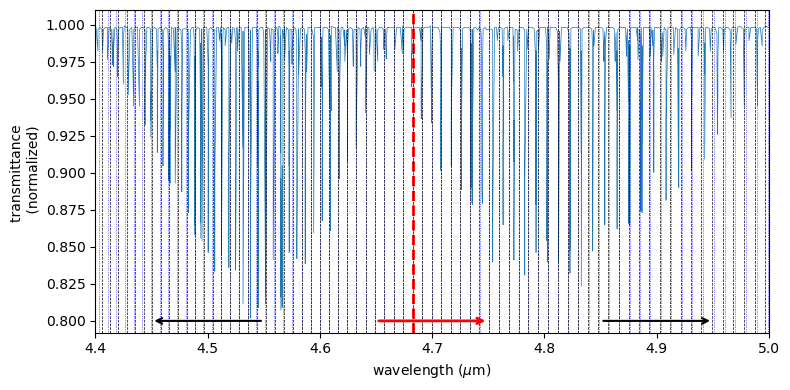

In [22]:
plt.figure(figsize=(8, 4))
plt.axvline(vib_wv.value, linewidth=2, color='red', linestyle='--')
plt.plot(CO_wvs, CO_flux, linewidth=0.5)
for transition_wv in transition_wvs_centrifugal:
    plt.axvline(transition_wv.value, linewidth=0.5, color='blue', linestyle=':')
for transition_wv in transition_wvs_simple:
    plt.axvline(transition_wv.value, linewidth=0.5, color='k', linestyle='--')
plt.xlim([4.4, 5])
plt.ylabel("transmittance \n (normalized)")
plt.xlabel("wavelength ($\mu$m)")
plt.tight_layout()
plt.annotate('',
                xy=(4.45, 0.8), xycoords='data',
                xytext=(4.55, 0.8), textcoords='data',
                arrowprops=dict(arrowstyle="->", linewidth=1.5))
plt.annotate('',
                xy=(4.95, 0.8), xycoords='data',
                xytext=(4.85, 0.8), textcoords='data',
                arrowprops=dict(arrowstyle="->", linewidth=1.5))
plt.annotate('',
                xy=(4.75, 0.8), xycoords='data',
                xytext=(4.65, 0.8), textcoords='data',
                arrowprops=dict(arrowstyle="->", linewidth=2, color='red'))
plt.savefig("plots/CO_vib_centrifugal.png", dpi=300)

In [23]:
coupling_constant = -0.017507 * u.cm**-1
coupling_constant = coupling_constant.to(u.eV, equivalencies=u.spectral())
coupling_constant, deltaE

(<Quantity -2.17059136e-06 eV>, <Quantity 0.00047564 eV>)

In [24]:
num_levels = 40
B_rotational_coupling = B_rotational.to(u.eV, equivalencies=u.spectral()) + coupling_constant * 0.5 * np.arange(-num_levels, num_levels+1)
deltaE_coupling = 2*B_rotational_coupling
energy_shifts_coupling = np.append(np.arange(-num_levels, 0)*(deltaE_coupling[:num_levels]), \
    np.arange(0, num_levels+1)*(deltaE_coupling[num_levels:]))
energy_levels_coupling = vib_energy + energy_shifts_coupling

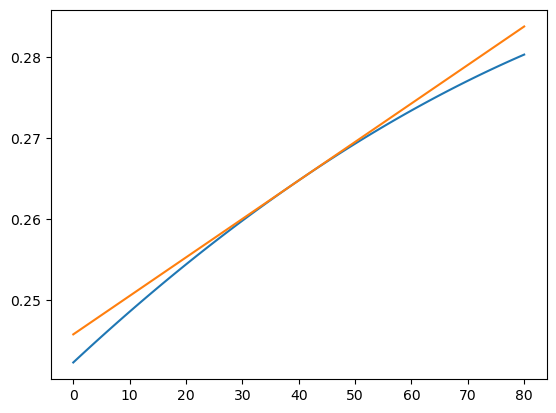

In [25]:
plt.plot(energy_levels_coupling)
plt.plot(energy_levels)

In [26]:
transition_wvs_coupling = (c.h * c.c / (energy_levels_coupling[::-1])).to(u.micron)
transition_wvs_coupling

<Quantity [4.42275842, 4.42756245, 4.43244571, 4.4374087 , 4.44245191,
           4.44757586, 4.45278107, 4.45806806, 4.46343738, 4.46888957,
           4.4744252 , 4.48004483, 4.48574905, 4.49153845, 4.49741364,
           4.50337522, 4.50942383, 4.5155601 , 4.52178469, 4.52809825,
           4.53450146, 4.540995  , 4.54757958, 4.5542559 , 4.5610247 ,
           4.5678867 , 4.57484266, 4.58189334, 4.58903953, 4.59628201,
           4.6036216 , 4.6110591 , 4.61859537, 4.62623124, 4.6339676 ,
           4.64180531, 4.64974528, 4.65778842, 4.66593566, 4.67418795,
           4.68254626, 4.69101156, 4.69958485, 4.70826716, 4.71705951,
           4.72596297, 4.7349786 , 4.74410749, 4.75335077, 4.76270955,
           4.772185  , 4.78177829, 4.79149061, 4.80132318, 4.81127723,
           4.82135404, 4.83155488, 4.84188106, 4.85233392, 4.8629148 ,
           4.87362509, 4.88446621, 4.89543957, 4.90654663, 4.9177889 ,
           4.92916787, 4.94068509, 4.95234212, 4.96414058, 4.97608209,
      

In [27]:
transition_wvs_coupling - transition_wvs_simple

<Quantity [5.41216304e-02, 5.15917249e-02, 4.91163912e-02, 4.66959947e-02,
           4.43309096e-02, 4.20215191e-02, 3.97682153e-02, 3.75713996e-02,
           3.54314826e-02, 3.33488844e-02, 3.13240346e-02, 2.93573727e-02,
           2.74493477e-02, 2.56004191e-02, 2.38110562e-02, 2.20817389e-02,
           2.04129573e-02, 1.88052125e-02, 1.72590163e-02, 1.57748913e-02,
           1.43533717e-02, 1.29950027e-02, 1.17003414e-02, 1.04699563e-02,
           9.30442812e-03, 8.20434967e-03, 7.17032609e-03, 6.20297514e-03,
           5.30292734e-03, 4.47082624e-03, 3.70732865e-03, 3.01310485e-03,
           2.38883884e-03, 1.83522859e-03, 1.35298630e-03, 9.42838612e-04,
           6.05526951e-04, 3.41807732e-04, 1.52452667e-04, 3.82490384e-05,
           0.00000000e+00, 3.85248691e-05, 1.54659436e-04, 3.49256277e-04,
           6.23185078e-04, 9.77332964e-04, 1.41260484e-03, 1.92992372e-03,
           2.53023113e-03, 3.21448741e-03, 3.98367213e-03, 4.83878448e-03,
           5.78084363e-03

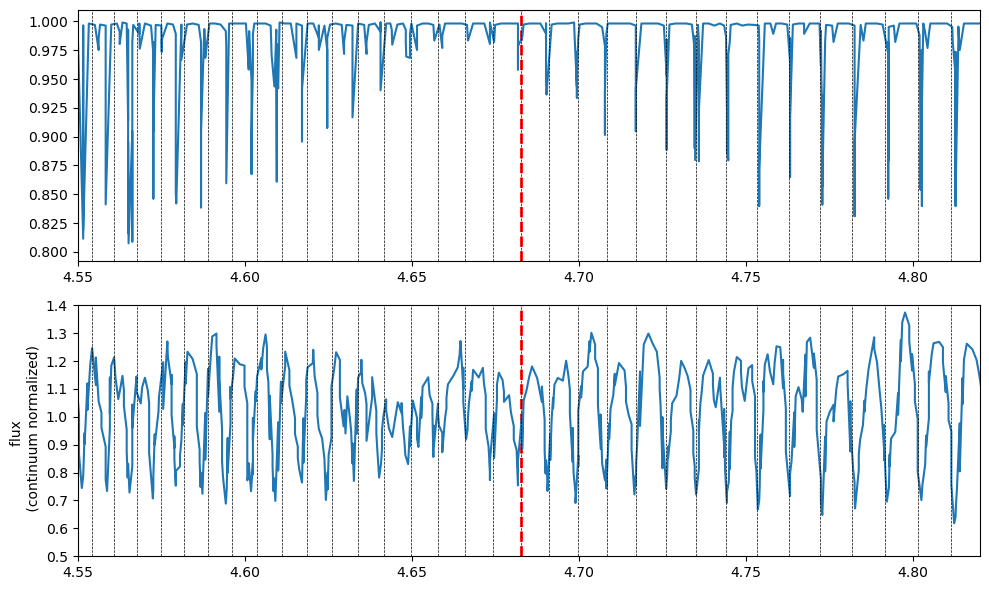

In [28]:
# plot subfigures top and bottom and long and short
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.axvline(vib_wv.value, linewidth=2, color='red', linestyle='--')
plt.plot(CO_wvs, CO_flux)
for transition_wv in transition_wvs_coupling:
    plt.axvline(transition_wv.value, linewidth=0.5, color='k', linestyle='--')
plt.xlim([4.55, 4.82])

plt.subplot(2, 1, 2)
plt.axvline(vib_wv.value, linewidth=2, color='red', linestyle='--')
plt.plot(jwst_wvs, jwst_features)
for transition_wv in transition_wvs_coupling:
    plt.axvline(transition_wv.value, linewidth=0.5, color='k', linestyle='--')
plt.xlim([4.55, 4.82])
plt.ylim([0.5, 1.4])
plt.ylabel("flux \n (continuum normalized)")
plt.tight_layout()
plt.savefig("plots/CO_vib_coupling.png", dpi=300)
plt.show()

In [29]:
D_rotational_coupling = 4 * (B_rotational_coupling.to(u.GHz, equivalencies=u.spectral()))**3 / nu**2
D_rotational_coupling.to(u.GHz)

<Quantity [0.00030687, 0.00030333, 0.00029982, 0.00029633, 0.00029287,
           0.00028944, 0.00028604, 0.00028266, 0.00027931, 0.00027599,
           0.00027269, 0.00026942, 0.00026618, 0.00026296, 0.00025977,
           0.0002566 , 0.00025346, 0.00025035, 0.00024726, 0.0002442 ,
           0.00024116, 0.00023814, 0.00023516, 0.00023219, 0.00022926,
           0.00022634, 0.00022346, 0.00022059, 0.00021775, 0.00021494,
           0.00021215, 0.00020938, 0.00020664, 0.00020393, 0.00020123,
           0.00019856, 0.00019592, 0.00019329, 0.0001907 , 0.00018812,
           0.00018557, 0.00018304, 0.00018053, 0.00017805, 0.00017559,
           0.00017315, 0.00017074, 0.00016835, 0.00016598, 0.00016363,
           0.00016131, 0.000159  , 0.00015672, 0.00015446, 0.00015223,
           0.00015001, 0.00014782, 0.00014564, 0.00014349, 0.00014136,
           0.00013925, 0.00013717, 0.0001351 , 0.00013306, 0.00013103,
           0.00012903, 0.00012704, 0.00012508, 0.00012314, 0.00012121,
      

In [30]:
energy_shifts_both = energy_shifts_coupling + (4 * c.h * D_rotational_coupling)
energies_both = vib_energy + energy_shifts_both
transition_wvs_both = (c.h * c.c / (energies_both[::-1])).to(u.micron)
transition_wvs_both

<Quantity [4.4227584 , 4.42756242, 4.43244568, 4.43740867, 4.44245188,
           4.44757583, 4.45278104, 4.45806803, 4.46343735, 4.46888954,
           4.47442517, 4.4800448 , 4.48574902, 4.49153842, 4.4974136 ,
           4.50337519, 4.50942379, 4.51556007, 4.52178465, 4.52809821,
           4.53450142, 4.54099496, 4.54757954, 4.55425586, 4.56102466,
           4.56788666, 4.57484262, 4.5818933 , 4.58903949, 4.59628197,
           4.60362155, 4.61105906, 4.61859532, 4.6262312 , 4.63396755,
           4.64180526, 4.64974523, 4.65778837, 4.66593561, 4.6741879 ,
           4.6825462 , 4.6910115 , 4.6995848 , 4.7082671 , 4.71705946,
           4.72596291, 4.73497854, 4.74410743, 4.7533507 , 4.76270949,
           4.77218494, 4.78177822, 4.79149054, 4.80132311, 4.81127716,
           4.82135397, 4.83155481, 4.84188099, 4.85233384, 4.86291473,
           4.87362502, 4.88446613, 4.89543949, 4.90654655, 4.91778881,
           4.92916778, 4.940685  , 4.95234204, 4.9641405 , 4.976082  ,
      

In [31]:
transition_wvs_both - transition_wvs_simple

<Quantity [ 5.41216040e-02,  5.15916980e-02,  4.91163637e-02,
            4.66959667e-02,  4.43308811e-02,  4.20214900e-02,
            3.97681857e-02,  3.75713694e-02,  3.54314519e-02,
            3.33488531e-02,  3.13240028e-02,  2.93573402e-02,
            2.74493147e-02,  2.56003854e-02,  2.38110219e-02,
            2.20817040e-02,  2.04129218e-02,  1.88051764e-02,
            1.72589794e-02,  1.57748538e-02,  1.43533335e-02,
            1.29949638e-02,  1.17003018e-02,  1.04699160e-02,
            9.30438709e-03,  8.20430790e-03,  7.17028359e-03,
            6.20293187e-03,  5.30288330e-03,  4.47078142e-03,
            3.70728304e-03,  3.01305843e-03,  2.38879160e-03,
            1.83518052e-03,  1.35293738e-03,  9.42788833e-04,
            6.05476299e-04,  3.41756193e-04,  1.52400225e-04,
            3.81956808e-05, -5.42884591e-08,  3.84696348e-05,
            1.54603241e-04,  3.49199105e-04,  6.23126914e-04,
            9.77273792e-04,  1.41254464e-03,  1.92986248e-03,
        

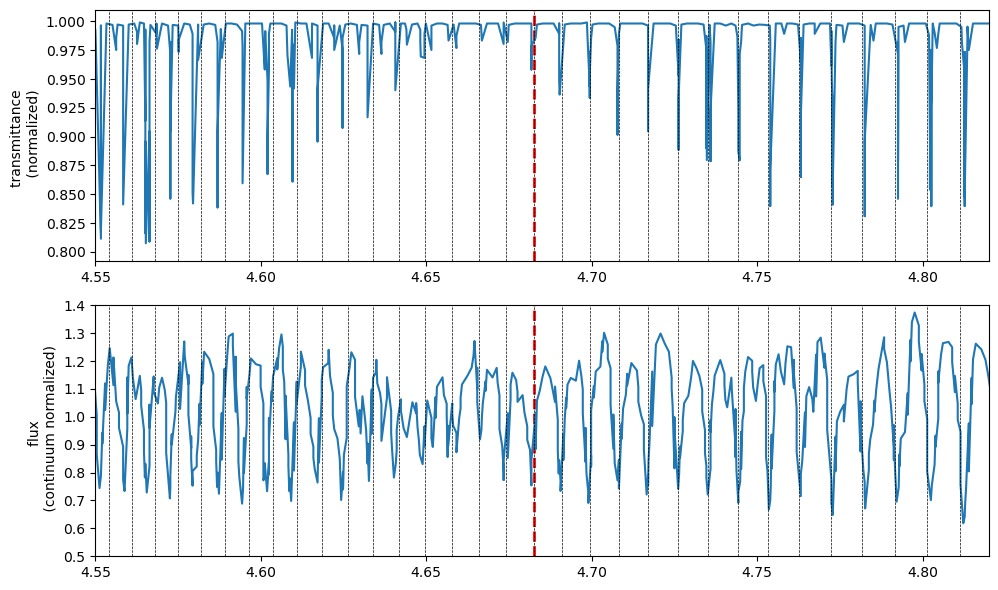

In [32]:
# plot subfigures top and bottom and long and short
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.axvline(vib_wv.value, linewidth=2, color='red', linestyle='--')
plt.plot(CO_wvs, CO_flux)
for transition_wv in transition_wvs_both:
    plt.axvline(transition_wv.value, linewidth=0.5, color='k', linestyle='--')
plt.xlim([4.55, 4.82])
plt.ylabel("transmittance \n (normalized)")

plt.subplot(2, 1, 2)
plt.axvline(vib_wv.value, linewidth=2, color='red', linestyle='--')
plt.plot(jwst_wvs, jwst_features)
for transition_wv in transition_wvs_both:
    plt.axvline(transition_wv.value, linewidth=0.5, color='k', linestyle='--')
plt.xlim([4.55, 4.82])
plt.ylim([0.5, 1.4])
plt.ylabel("flux \n (continuum normalized)")
plt.tight_layout()
plt.savefig("plots/CO_vib_both.png", dpi=300)
plt.show()

# Modeling the Depth

In [83]:
j_values = np.arange(-num_levels, num_levels+1) + 1
transition_wvs_both.shape, j_values.shape

((81,), (81,))

In [93]:
def I_j(index, T=1100*u.K):
    j = j_values[index]
    return np.abs((2*j+1) * B_rotational_coupling[index] / (c.k_B * T) * \
        np.exp(-B_rotational_coupling[index] * j * (j+1) / (c.k_B * T)))

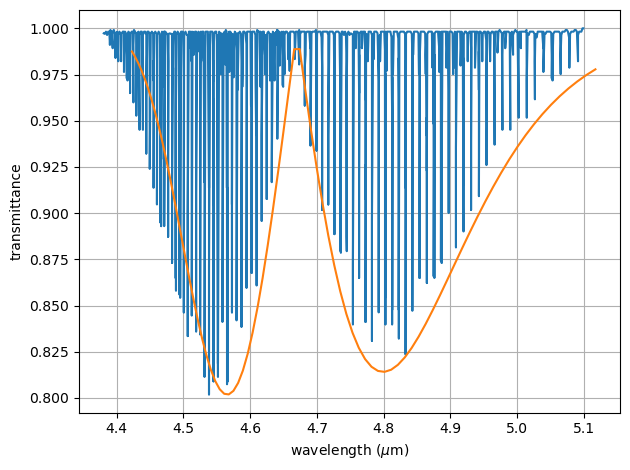

In [102]:
wvs, flux = CO_wvs, CO_flux
intensities = I_j(np.arange(0, 2*num_levels+1))
intensities = intensities / np.nanmax(intensities)
intensities *= (1 - np.nanmin(flux).value)
intensities = 1 - intensities.value

plt.figure()
plt.plot(wvs, flux)
plt.plot(transition_wvs_both, intensities)
plt.xlabel("wavelength ($\mu$m)")
plt.ylabel("transmittance")
plt.tight_layout()
plt.grid()
plt.savefig("plots/CO_depth_template.png", dpi=300)
plt.show()

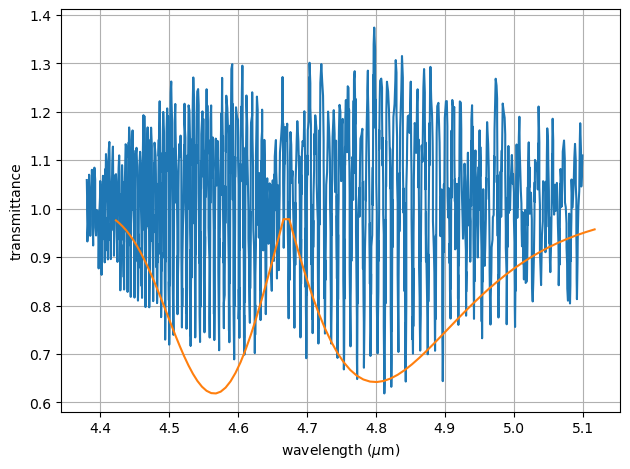

In [103]:
wvs, flux = jwst_wvs, jwst_features
intensities = I_j(np.arange(0, 2*num_levels+1))
intensities = intensities / np.nanmax(intensities)
intensities *= (1 - np.nanmin(flux).value)
intensities = 1 - intensities.value

plt.figure()
plt.plot(wvs, flux)
plt.plot(transition_wvs_both, intensities)
plt.xlabel("wavelength ($\mu$m)")
plt.ylabel("transmittance")
plt.tight_layout()
plt.grid()
plt.savefig("plots/CO_depth_jwst.png", dpi=300)
plt.show()